In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import condor
from numpy.fft import fftn, fftshift
import time

In [2]:
# X-ray source
photon = condor.utils.photon.Photon(energy_eV=1500.)
source = condor.Source(wavelength=photon.get_wavelength(), 
                       focus_diameter=1000e-9,
                       pulse_energy=0.024)

print("wavelength =", photon.get_wavelength())

wavelength = 8.265613228880017e-10


In [3]:
particles = {
    # single proteins
    "particle_atoms": 
    condor.ParticleAtoms(pdb_filename="input/pdb/1AON.pdb",
                         rotation_formalism="quaternion",
                         rotation_values = [1, 0, 0, 0]),
}

In [4]:
# area pixel detector (pnCCD without detector gap)
detector = condor.Detector(distance=0.15, 
                           nx=1024, 
                           ny=1024, 
                           pixel_size=75e-6, 
                           noise="poisson")

In [5]:
# experiment object
experiment = condor.Experiment(source, particles, detector)

start_time = time.time()

# calculate diffraction pattern and obtain results in a dict
results = experiment.propagate()

# arrays for Fourier and real space
intensity_pattern = results["entry_1"]["data_1"]["data"]
fourier_pattern = results["entry_1"]["data_1"]["data_fourier"]
results["patternson_image"] = fftshift(fftn(fftshift(intensity_pattern)))
results["projection_image"] = fftshift(fftn(fftshift(fourier_pattern)))

end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

print("total photons on detector =", np.sum(intensity_pattern))

--- 797.2820208072662 seconds ---
total photons on detector = 828415


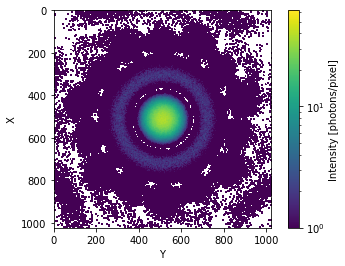

In [6]:
plt.imshow(intensity_pattern, norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label("Intensity [photons/pixel]")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()

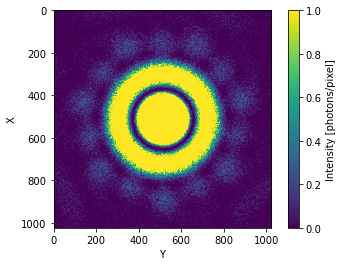

In [7]:
plt.imshow(intensity_pattern, vmax=1)
cbar = plt.colorbar()
cbar.set_label("Intensity [photons/pixel]")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()